<br>

Curious about gas prices in Israel I found a [governmental webpage](https://www.gov.il/he/departments/general/fuel_price_historycal) with some messy data detailing gas prices over the year. It was a great opportunity to practice data cleaning in Python (documented below) and later on rendering it as a [Quarto](https://quarto.org/) document. 

Try it yourself? Download the excel files from the link above or already unzipped from [my GitHub repo](https://github.com/AmitLevinson/python_playground/tree/main/gas_price/data).

<details>
    <summary><b>Click here for the solution</b></summary>

#### Data cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
files = os.listdir('data/')

files[0:3]

['stationprice2011.xls', 'stationprice2012.xls', 'stationprice2013.xls']

In [3]:
def read_clean_file(file_path):
    rawdata = pd.read_excel('data/'+file_path)
    rownum = rawdata.index[rawdata.iloc[:,0] == 'תאריך'].tolist()
    if not rownum:
        rownum = rawdata.index[rawdata.iloc[:,1] == 'תאריך'].tolist()
        rownum = int(rownum[0])
    else:
        rownum = int(rownum[0])
        
    df =pd.read_excel('data/' +file_path, skiprows = rownum + 1)
    
    clean_df = (df
                .rename(columns = {"תאריך": "datte", 'בנזין 95 אוקטן נטול עופרת' :'gas_price', "תוספת בעד שירות מלא": 'additional_price_full_service'})
                [['datte', 'gas_price', 'additional_price_full_service']]
                .dropna()
                .assign(datte = lambda x: pd.to_datetime(x['datte']))
        )
    
    return(clean_df)

In [4]:
dfs = list(map(read_clean_file, files))
gasprice = pd.concat(dfs)

</details>

In [5]:
gasprice # Cleaned output

,datte,gas_price,additional_price_full_service
0,2011-01-02,7.14,0.13
1,2011-02-01,7.26,0.13
2,2011-02-14,7.02,0.13
3,2011-03-01,7.30,0.13
4,2011-04-01,7.39,0.13
...,...,...,...
7,2015-08-02,6.38,0.19
8,2015-09-01,6.09,0.19
9,2015-10-01,6.07,0.19
10,2015-11-01,5.96,0.19


### What's going on?

If you look at the files you'll see some pattern across them. Some start in a specific row and one column off, and others at another row. The first part is basically for checking where do we want to start reading the files from, which we then load accordingly by skipping irrelevant rows. 

From there it's a basic cleaning process: renaming columns, selecting, removing NA (more irrelevant rows at the end) and mutating the date to a date format column.

Below is the plot now easily carried out with clean data.

#### Plot

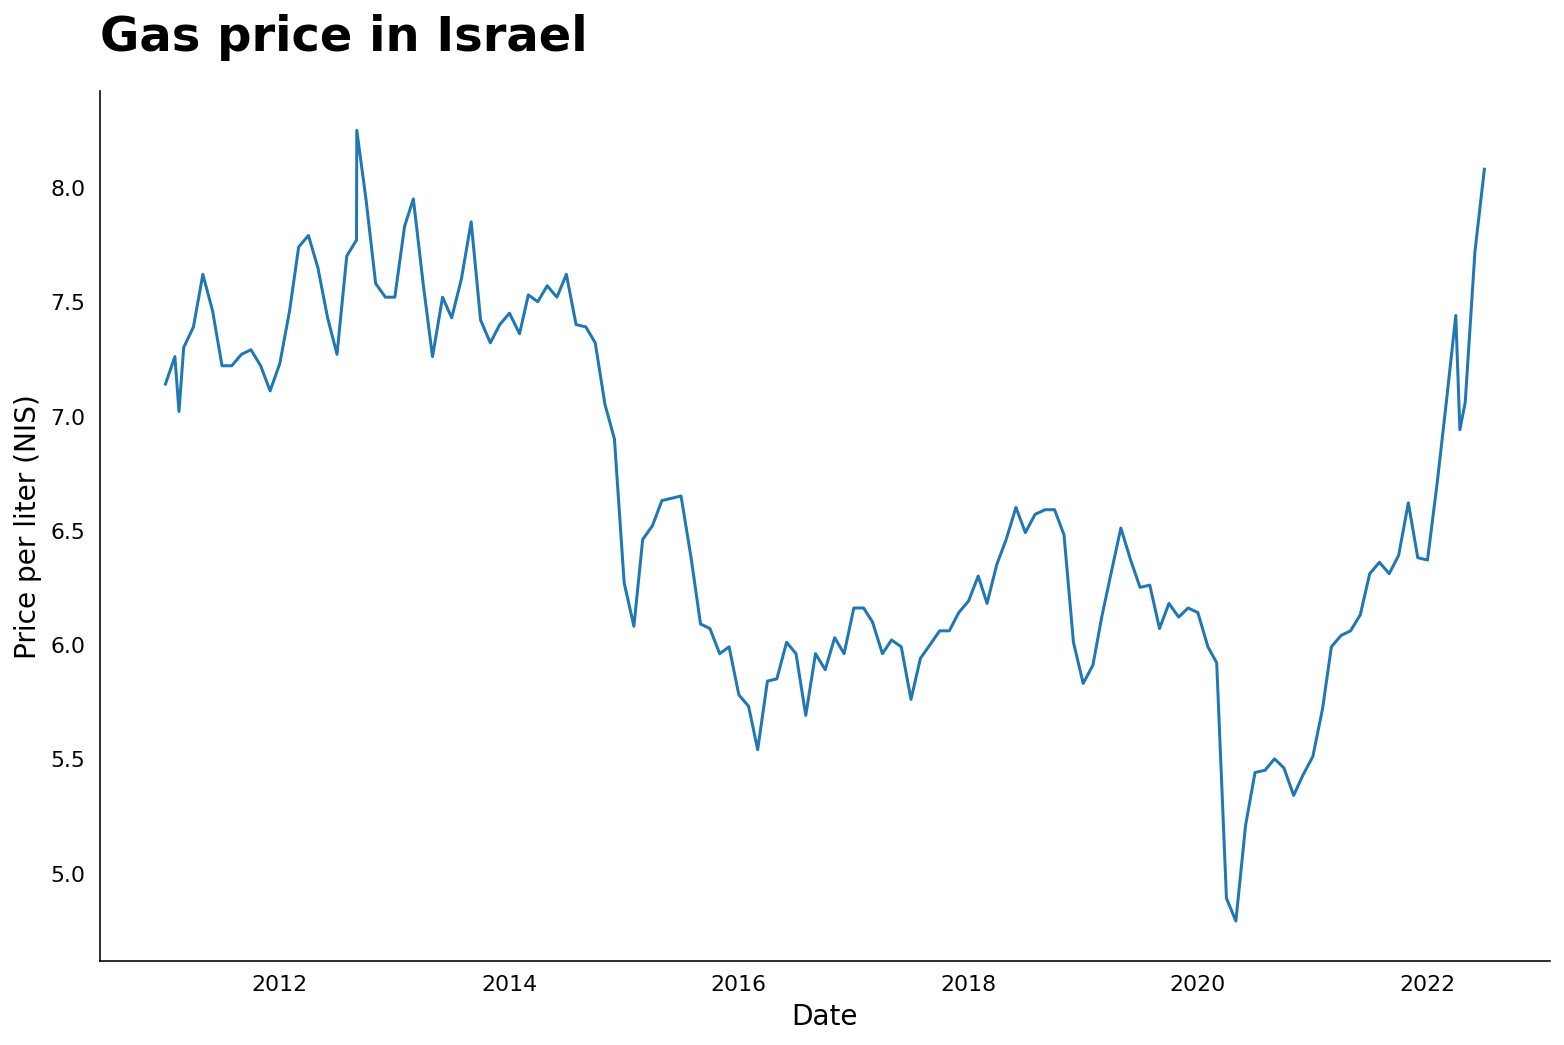

In [6]:
gasprice = gasprice.sort_values(by = 'datte')


fig, ax = plt.subplots(figsize = (13,8))
fig.patch.set_facecolor('white')

plt.plot(gasprice.datte, gasprice.gas_price)
plt.xlabel('Date', size = 14)
plt.ylabel('Price per liter (NIS)', size = 14)
ax.spines[["right", 'top']].set_visible(False)
plt.tick_params(bottom = False, left= False)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(11)
ax.set_title("Gas price in Israel", fontsize = 24, weight= 'bold',loc = 'left',  pad = 20)

plt.savefig('gas_price.png', transparent = False, dpi = 400)
plt.show()